In [ ]:
%pip install anthropic IPython

In [2]:
%load_ext autoreload
%autoreload 2

%load_ext dotenv
%dotenv

In [3]:
import base64
from anthropic import Anthropic

import os

In [4]:
client = Anthropic(
    api_key=os.environ.get('ANTHROPIC_API_KEY'),
)

MODEL_NAME = "claude-3-opus-20240229"

def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as image_file:
        binary_data = image_file.read()
        base_64_encoded_data = base64.b64encode(binary_data)
        base64_string = base_64_encoded_data.decode('utf-8')
        return base64_string

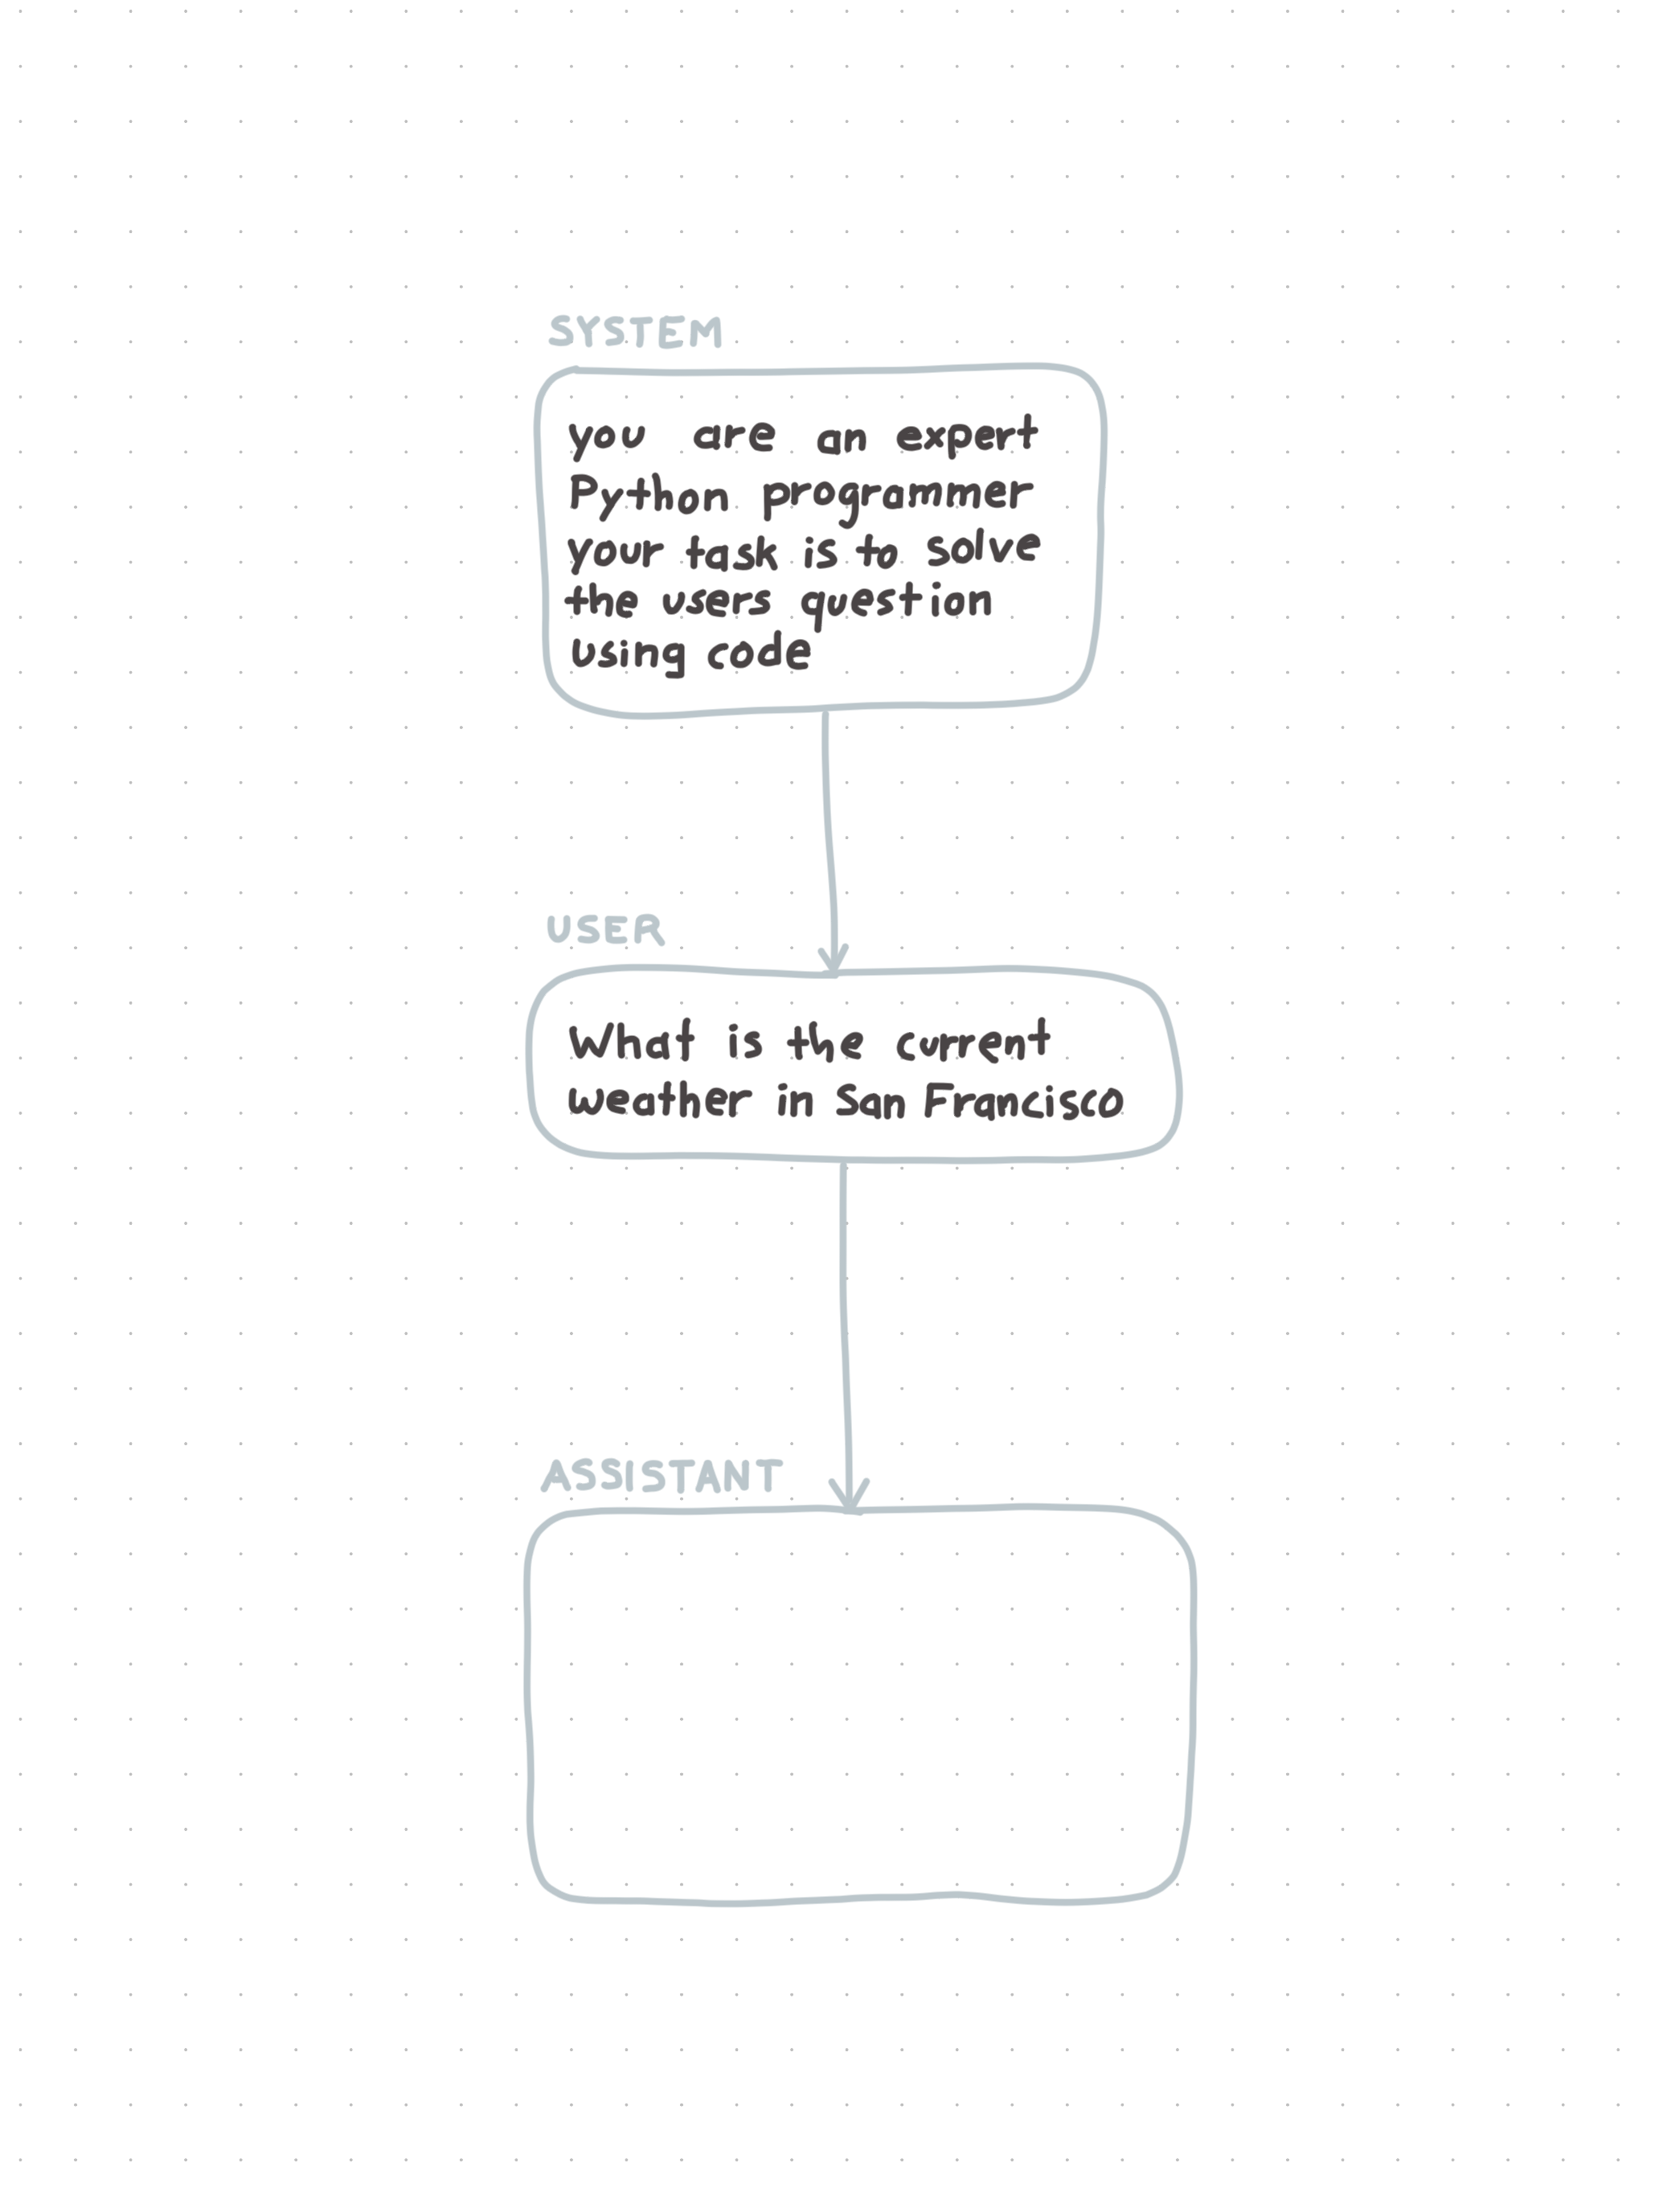

In [5]:
from IPython.display import Image

Image(filename='../data/weather.png') 

In [7]:
system_prompt = '''You are a AI engineer working on a prompt workflow. 
You have been tasked with creating a JSON Canvas diagram that shows the flow of prompts from a handwritten sketch.

The diagram should be formatted like this:

```json
{
	"nodes":[
		{"type":"group","id":"161279baf7763214","x":-174,"y":-160,"width":394,"height":340,"label":"Cannoli"},
		{"type":"text","text":"Hello world!","id":"dc3f9351f787531e","x":-97,"y":-91,"width":250,"height":60},
		{"type":"text","text":"","id":"bc1a550bbb4aac7b","x":-97,"y":60,"width":250,"height":60,"color":"6"},
		{"type":"text","text":"The purple node is a content node. Content nodes can be used to store and display text that can be read or written by you or another node.","id":"f77169b141243e65","x":240,"y":30,"width":420,"height":120},
		{"type":"text","text":"The colorless, green, or yellow node is a call node. Call nodes make a chat completion call to the LLM with the text of the node as a user message.","id":"0af5a453bd4d6ec9","x":240,"y":-110,"width":380,"height":120},
		{"type":"text","text":"If a node in a cannoli is floating (no arrows attached) it won't affect the cannoli unless it is formatted in a special way we'll go over later.","id":"7d005c80299f3674","x":-202,"y":220,"width":461,"height":112},
		{"type":"text","text":"This is a Cannoli. It's made up of different types of nodes and arrows.\n\nTry running it by clicking the Cannoli button in the control ribbon on the left side of your Obsidian window.","id":"24dd96c964700992","x":-147,"y":-400,"width":350,"height":180},
		{"type":"text","text":"Cannolis can be run in several ways:\n\n- Click the Cannoli ribbon icon\n    - If you're on a canvas file, it will be run as a cannoli\n    - If you're on a note with a \"cannoli\" property, the canvas file in that property will be run as a cannoli\n- Run the \"Start/Stop cannoli\" command in the command palette (functions the same as the ribbon icon)\n- If a canvas file name ends with \".cno\", it will have its own run command in the command palette\n- Make an audio recording on a note with a \"cannoli\" property\n\t- That recording will be transcribed, replace the reference, and trigger the cannoli defined in the property.","id":"927cf33512b0dfc1","x":-740,"y":-182,"width":538,"height":402}
	],
	"edges":[
		{"id":"23c2d7dffb49bf75","fromNode":"dc3f9351f787531e","fromSide":"bottom","toNode":"bc1a550bbb4aac7b","toSide":"top"}
	]
}
```'''

user_prompt = '''Create a JSON Canvas. Only output the JSON code.'''

image = "../data/weather.png"

message_list = [
    {
        "role": 'user',
        "content": [
            {
                "type": "image", "source": {
                    "type": "base64", 
                    "media_type": "image/png", 
                    "data": get_base64_encoded_image(image)
                }
            }, {
                "type": "text", 
                "text": user_prompt
            }
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    system=system_prompt,
    messages=message_list
)
print(response.content[0].text)

```json
{
  "nodes": [
    {
      "type": "text",
      "text": "you are an expert\nPython programmer\nyour task is to solve\nthe users question\nusing code",
      "id": "1",
      "x": 0,
      "y": 0,
      "width": 250,
      "height": 100
    },
    {
      "type": "text",
      "text": "What is the current\nweather in San Francisco",
      "id": "2",
      "x": 0,
      "y": 200,
      "width": 200,
      "height": 60
    },
    {
      "type": "text",
      "text": "",
      "id": "3",
      "x": 0,
      "y": 300,
      "width": 200,
      "height": 60
    },
    {
      "type": "text",
      "text": "SYSTEM",
      "id": "4",
      "x": -100,
      "y": -50,
      "width": 100,
      "height": 50
    },
    {
      "type": "text", 
      "text": "USER",
      "id": "5",
      "x": -80,
      "y": 170,
      "width": 80,
      "height": 30
    },
    {
      "type": "text",
      "text": "ASSISTANT",
      "id": "6",
      "x": -120,
      "y": 270,
      "width": 120,
      "